<font size="+3" color='#053c96'><b> Problem Statement</b></font>

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

<font size="+3" color='#053c96'><b>Bussiness Goal</b></font>

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

<font size="+3" color='#053c96'><b>This Notebook will cover the following - </b></font>
### 1. Data cleaning
### 2. Exploratory Data Analysis
### 3. Feature selection using Recursive Feature elimination(RFE)
### 4. Data Modelling and evaluation

<font size="+2" color=chocolate ><b>Please Upvote my kernel if you like my work.</b></font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(8,8)})

<font size="+3" color='#540b11'><b>1. Data cleaning </b></font>

In [2]:
data=pd.read_csv('../input/car-price-prediction/CarPrice_Assignment.csv')

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Drop car Id 

In [4]:
data=data.drop(['car_ID'],axis=1)

## Extracting car company from car name

In [5]:
data['CarName'] = data['CarName'].str.split(' ',expand=True)

## Handling duplicate values in car name 

* nissan and Nissan are same
* toyota and toyouta are same 
* vokswagen , volkswagen and vw are same
* mazda and maxda are same
* porcshce and porsche are same

In [6]:
data['CarName'] = data['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [7]:
data['symboling']=data['symboling'].astype('str')

# Categorical columns

In [8]:
categorical_cols=data.select_dtypes(include=['object']).columns

In [9]:
data[categorical_cols].head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi


## Numerical columns 

In [10]:
numerical_cols=data.select_dtypes(exclude=['object']).columns

In [11]:
data[numerical_cols].head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0


<font size="+3" color='#540b11'><b>2. Exploratory Data Analysis </b></font>

In [12]:
data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Visualise different car names 

In [13]:
df=pd.DataFrame(data['CarName'].value_counts()).reset_index().rename(columns={'index':'car_name','CarName': 'count'})

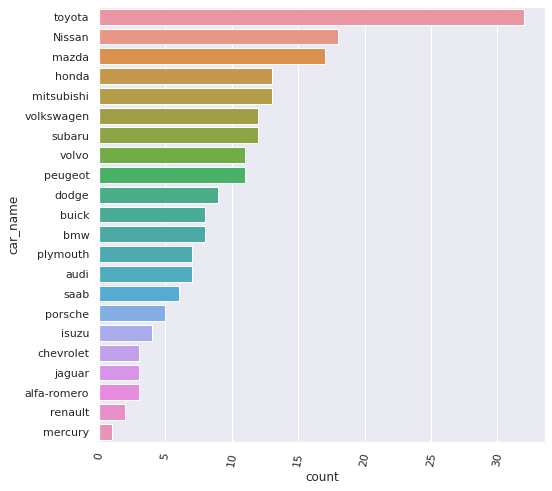

In [14]:
plot = sns.barplot(y='car_name',x='count',data=df)
plot=plt.setp(plot.get_xticklabels(), rotation=80)

According to the dataset-
* Toyota is the most suitable car 
* mercury is the least suitable car

# Fuel type Ratio

In [15]:
df=pd.DataFrame(data['fueltype'].value_counts())

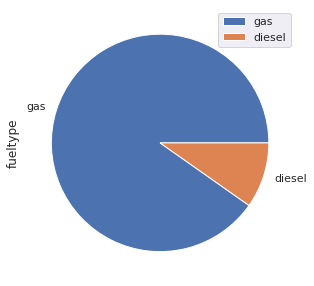

In [16]:
plot = df.plot.pie(y='fueltype', figsize=(5, 5))

* Most of the car has gas fuel 

# Price distribution of cars

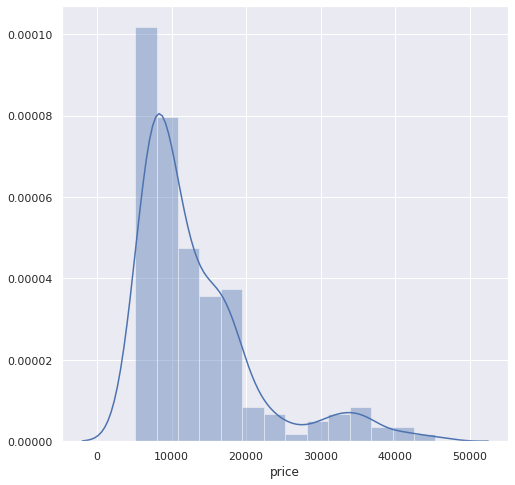

In [17]:
sns.distplot(data['price'],kde=True)

* Price distribution plot is right skewed 
* maximum  number of cars are in range of 20000

# Price distribution of diesel vs gas car

Text(0.5, 1.0, 'Distribution of ages of diesel vehicles')

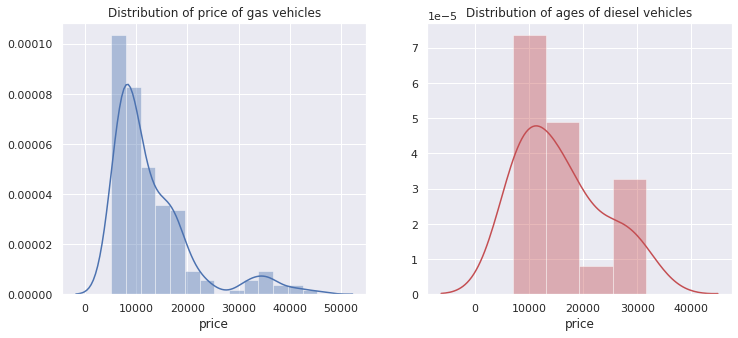

In [18]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.fueltype== 'gas')]["price"],color='b',ax=ax)
ax.set_title('Distribution of price of gas vehicles')

ax=f.add_subplot(122)
sns.distplot(data[(data.fueltype == 'diesel')]['price'],color='r',ax=ax)
ax.set_title('Distribution of ages of diesel vehicles')

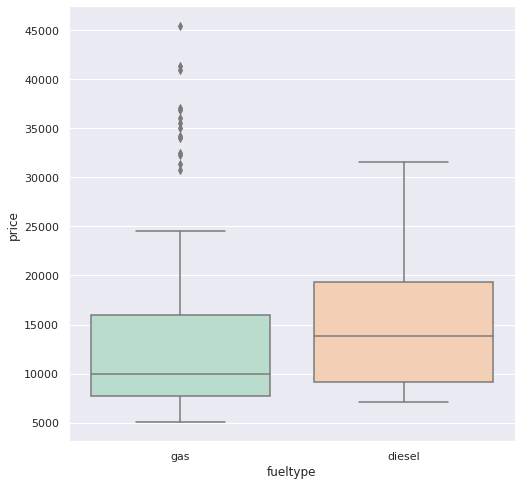

In [19]:
sns.boxplot(x = 'fueltype', y = 'price', data = data,palette='Pastel2')

* Price of diesel is much higher than of gas , also there are some outliers in gas vehicles

# Aspiration ratio

In [20]:
df=pd.DataFrame(data['aspiration'].value_counts())

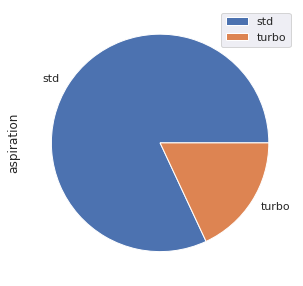

In [21]:
plot = df.plot.pie(y='aspiration', figsize=(5, 5))

* Most of the cars have standard aspiration

# Price distribution of Std vs Turbo aspiration vehicles

Text(0.5, 1.0, 'Price distribution of Std aspiration vehicles')

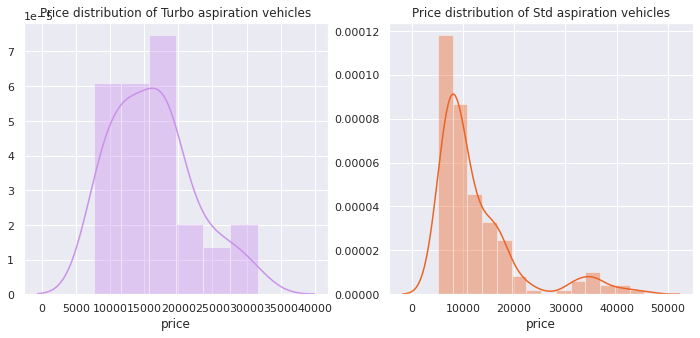

In [22]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plot=sns.distplot(data[(data.aspiration== 'turbo')]["price"],color='#ca91eb',ax=ax)
ax.set_title('Price distribution of Turbo aspiration vehicles')

ax=f.add_subplot(122)
plot=sns.distplot(data[(data.aspiration == 'std')]['price'],color='#eb6426',ax=ax)
ax.set_title('Price distribution of Std aspiration vehicles')


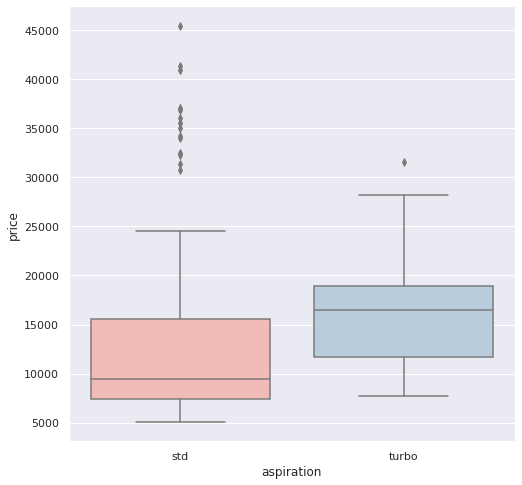

In [23]:
sns.boxplot(x = 'aspiration', y = 'price', data = data,palette='Pastel1')

* Price of turbo is higher in compared to std , although there are some outliers in std price

# Symboling 

Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

In [24]:
df=pd.DataFrame(data['symboling'].value_counts()).reset_index().rename(columns={'index':'symboling','symboling':'count'})

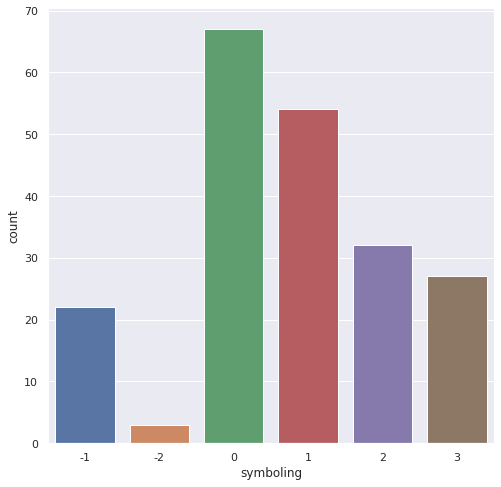

In [25]:
sns.barplot(x='symboling',y='count',data=df)

 * Most of the car symboling has 0 value 

# Price distribution according to symboling 

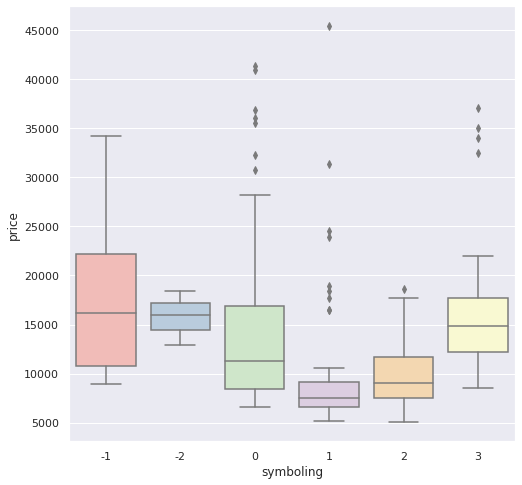

In [26]:
sns.boxplot(x = 'symboling', y = 'price', data = data,palette='Pastel1')

* Price of -1 symboling is higher in compare to others

# Door number

In [27]:
df=pd.DataFrame(data['doornumber'].value_counts())

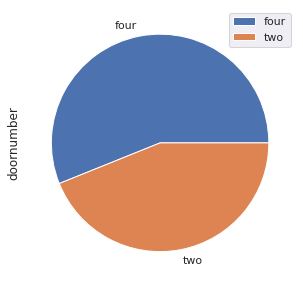

In [28]:
plot = df.plot.pie(y='doornumber', figsize=(5, 5))

* 115 cars has four dooors and 90 cars has 2 doors

# Price distribution according to door number 

Text(0.5, 1.0, 'Price distribution of cars having four doors')

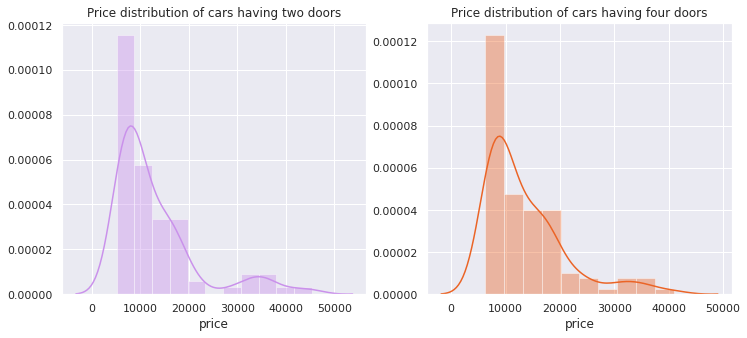

In [29]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plot=sns.distplot(data[(data.doornumber== 'two')]["price"],color='#ca91eb',ax=ax)
ax.set_title('Price distribution of cars having two doors')

ax=f.add_subplot(122)
plot=sns.distplot(data[(data.doornumber == 'four')]['price'],color='#eb6426',ax=ax)
ax.set_title('Price distribution of cars having four doors')


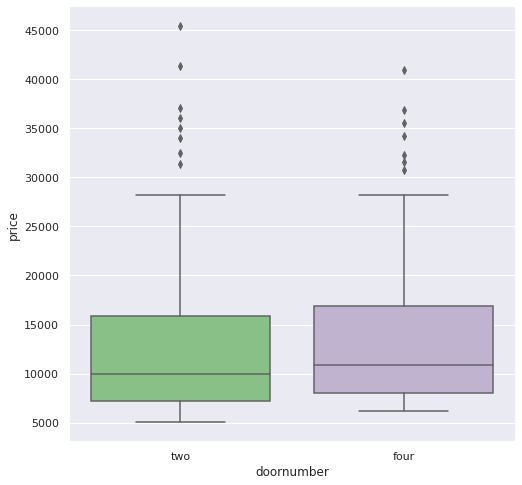

In [30]:
sns.boxplot(x = 'doornumber', y = 'price', data = data,palette='Accent')

* As you can see there is slight difference in distributions of cars having two doors vs cars having 4 doors

# Carbody

In [31]:
df=pd.DataFrame(data['carbody'].value_counts())

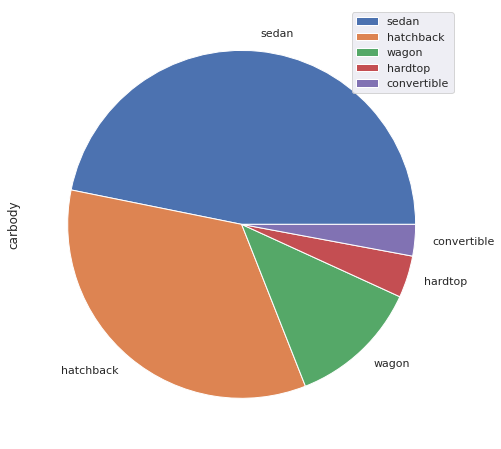

In [32]:
plot = df.plot.pie(y='carbody', figsize=(8, 8))

* majority of car body are sedan and hatchback

# Price distribution according to car body

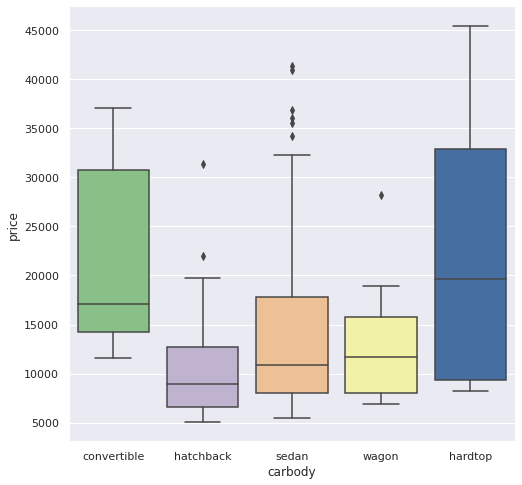

In [33]:
sns.boxplot(x = 'carbody', y = 'price', data = data,palette='Accent')

* price of hardtop is very high compare to others

# Drive wheel

In [34]:
df=pd.DataFrame(data['drivewheel'].value_counts())

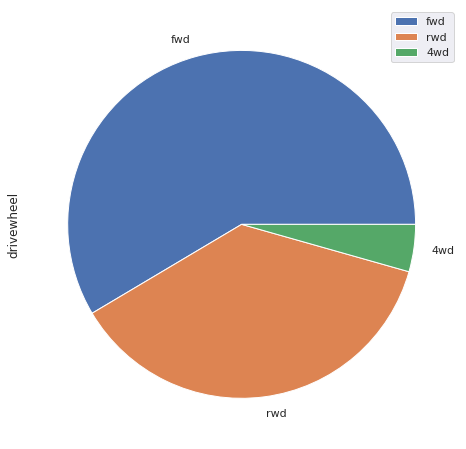

In [35]:
plot = df.plot.pie(y='drivewheel', figsize=(8, 8))

* Maximum cars has fwd drive wheel

# Price distribution according to drive wheel 

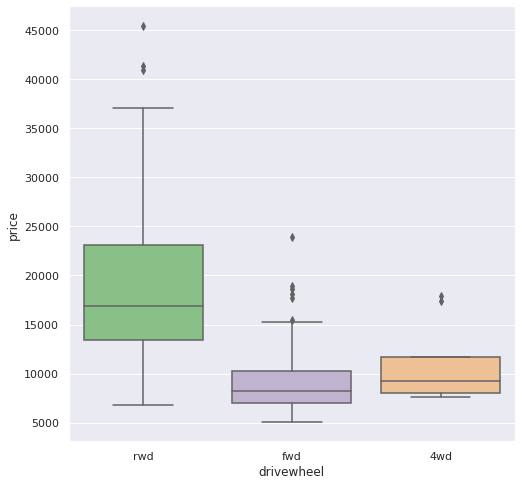

In [36]:
sns.boxplot(x = 'drivewheel', y = 'price', data = data,palette='Accent')

* Price range of rwd drivewheel cars is quite high compare to others

# Engine location

In [37]:
df=pd.DataFrame(data['enginelocation'].value_counts())

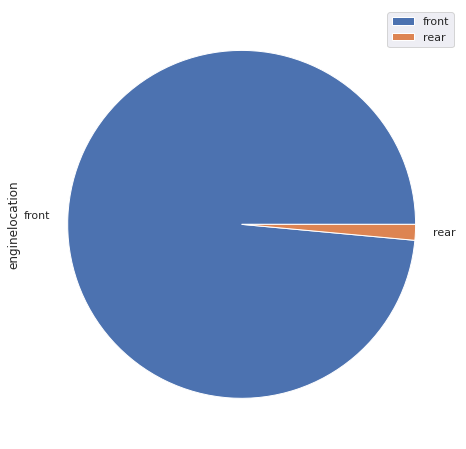

In [38]:
plot = df.plot.pie(y='enginelocation', figsize=(8, 8))

* less number of cars having rear engine 

# Engine type

In [39]:
df=pd.DataFrame(data['enginetype'].value_counts())

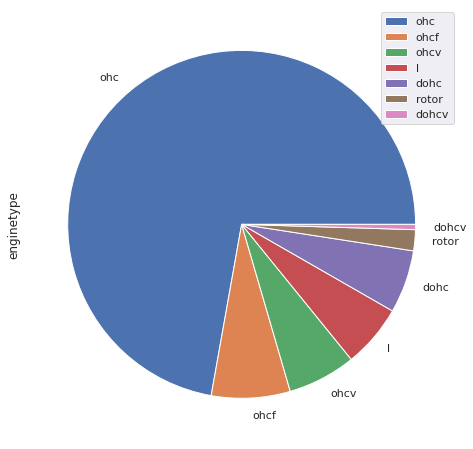

In [40]:
plot = df.plot.pie(y='enginetype', figsize=(8, 8))

* Maximum number of engine type are of 'ohc'

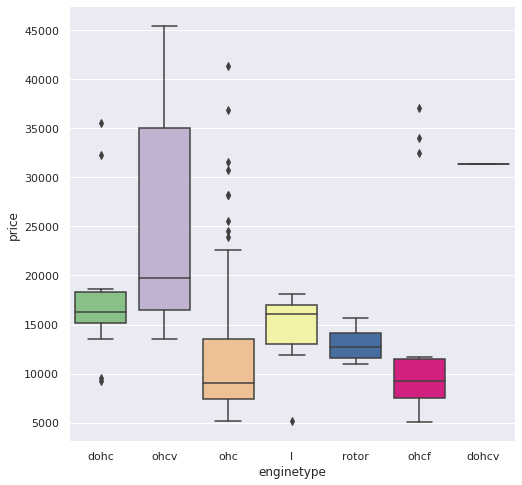

In [41]:
sns.boxplot(x = 'enginetype', y = 'price', data = data,palette='Accent')

* price range of ohcv engine cars are quite high in compare to others

# Cylinder number

In [42]:
df=pd.DataFrame(data['cylindernumber'].value_counts())

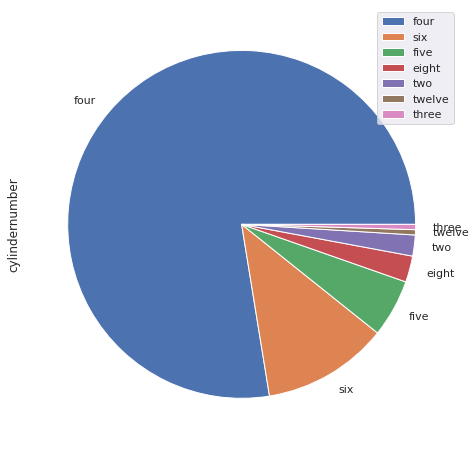

In [43]:
plot = df.plot.pie(y='cylindernumber', figsize=(8, 8))

* maximum cars are of four cylinder number

# Price distribution according to cylinder number

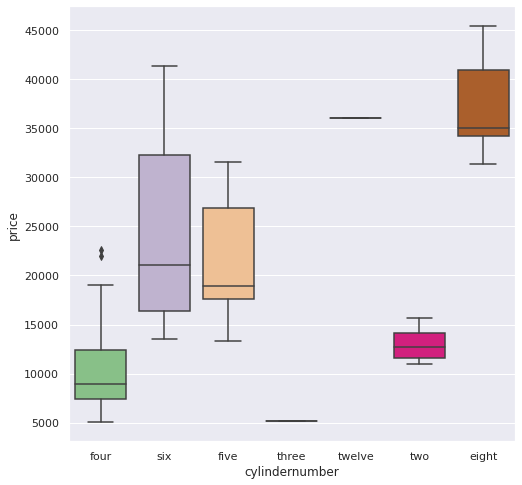

In [44]:
sns.boxplot(x = 'cylindernumber', y = 'price', data = data,palette='Accent')

* there is only 1 car having cylinder number 3 and 12 .
* car having cylinder number eight has higher price range.

# Fuel system 

In [45]:
df=pd.DataFrame(data['fuelsystem'].value_counts()).reset_index().rename(columns={'index':'fuelsystem','fuelsystem':'count'})

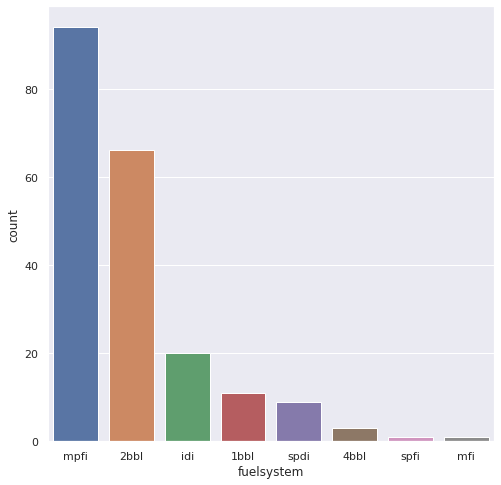

In [46]:
sns.barplot(x='fuelsystem',y='count',data=df)

* most number of cars having fuel system mpfi
* least number of cars having fuel system mfi and spfi

# Price distribution according to fuel system

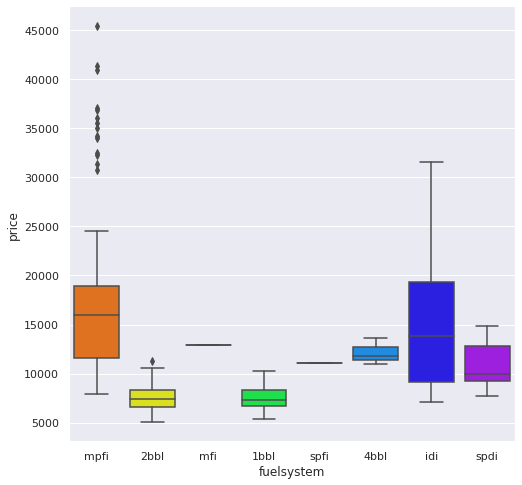

In [47]:
sns.boxplot(x = 'fuelsystem', y = 'price', data = data,palette='gist_rainbow')

* price range are high of car having idi fuel system 

# Visualising Numerical features

# Wheel base Vs Price


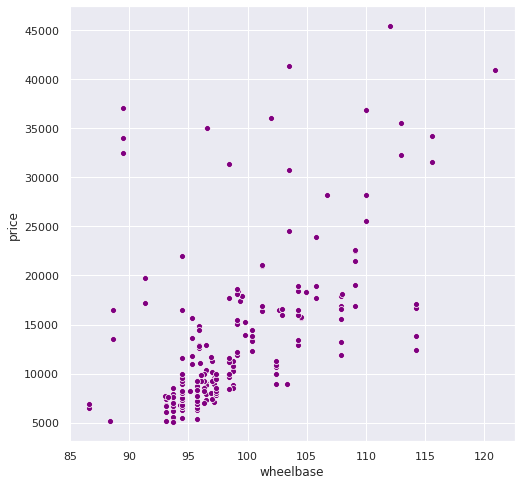

In [48]:
sns.scatterplot(x="wheelbase", y="price", data=data,color='purple')

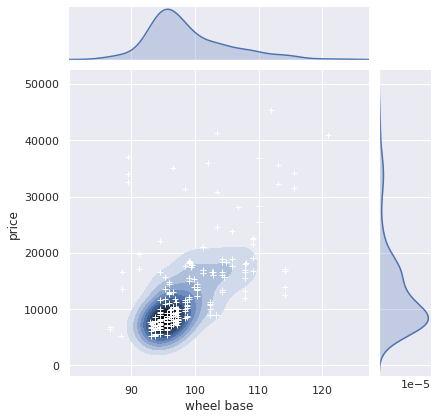

In [49]:
g = sns.jointplot(x="wheelbase", y="price", data=data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("wheel base", "price");

* Highly scattered points

# Carlength vs Car price

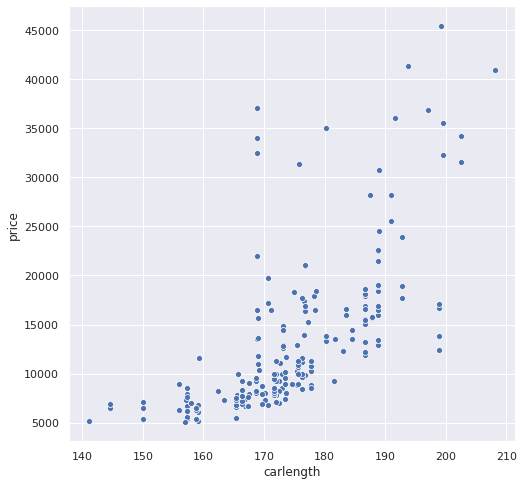

In [50]:
sns.scatterplot(x="carlength", y="price", data=data,color='b')

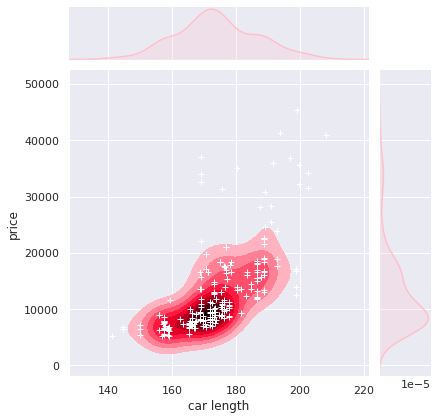

In [51]:
g = sns.jointplot(x="carlength", y="price", data=data, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car length", "price");

* car length also scattered but less scattered than wheelbase

# Car width Vs Price

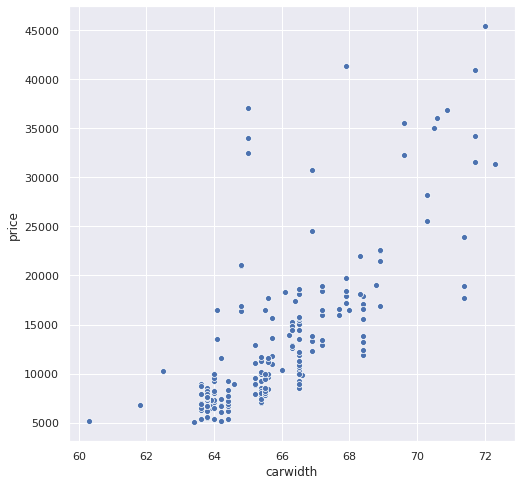

In [52]:
sns.scatterplot(x="carwidth", y="price", data=data,color='b')

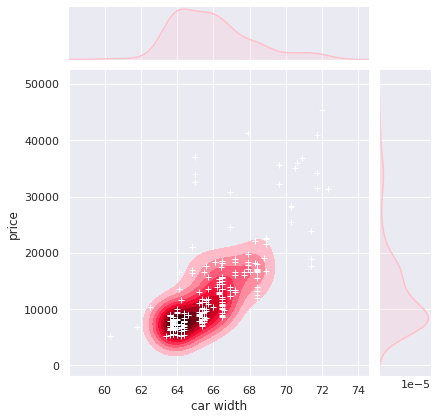

In [53]:
g = sns.jointplot(x="carwidth", y="price", data=data, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car width", "price");

# Car length vs Car width

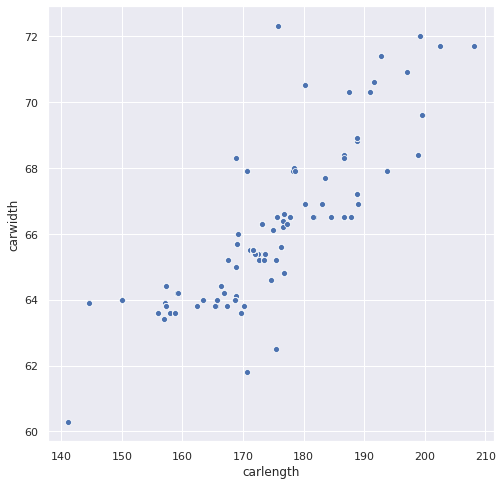

In [54]:
sns.scatterplot(x="carlength", y="carwidth", data=data,color='b')

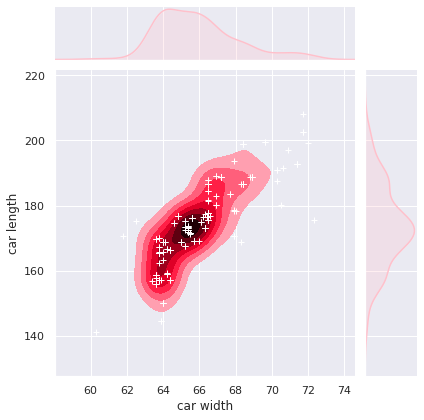

In [55]:
g = sns.jointplot(x="carwidth", y="carlength", data=data, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car width", "car length");

* interesting !!! strong relation is seemed between car length and car width 

# Curbweight vs Price

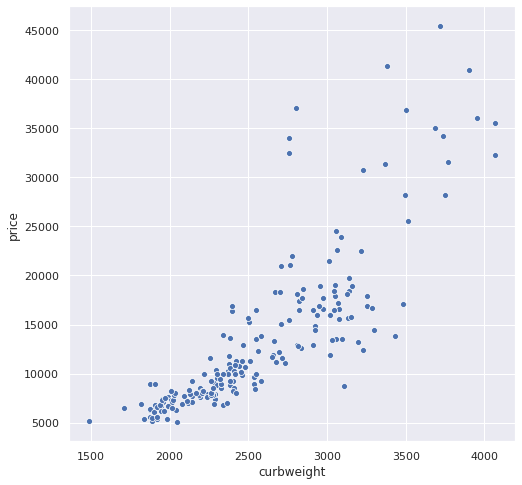

In [56]:
sns.scatterplot(x="curbweight", y="price", data=data,color='b')

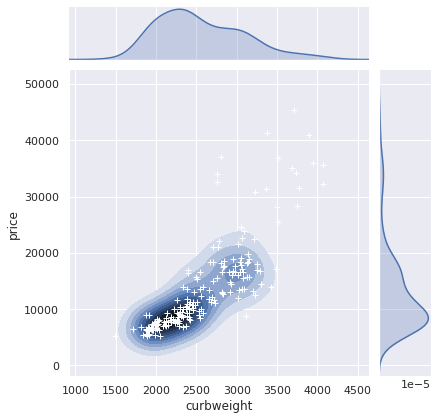

In [57]:
g = sns.jointplot(x="curbweight", y="price", data=data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("curbweight", "price");

* points are scattered after curbweight of 2900, initially it is increasing as curbweight increases as you can alse see in the joint plot color becomes lighter after curbweight of 2900 .

# Engine size Vs Price

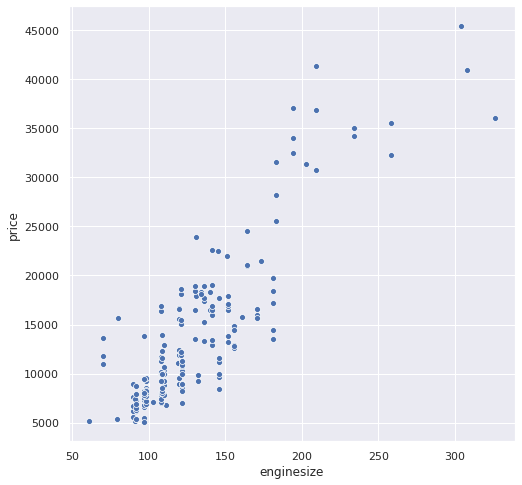

In [58]:
sns.scatterplot(x="enginesize", y="price", data=data,color='b')

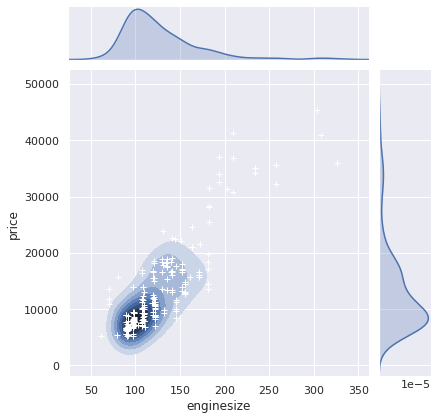

In [59]:
g = sns.jointplot(x="enginesize", y="price", data=data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("enginesize", "price");

* points are scattered after engine size of 140, initially it is increasing as curbweight increases as you can alse see in the joint plot color becomes lighter after engine size of 140 .

# Boreratio vs Price

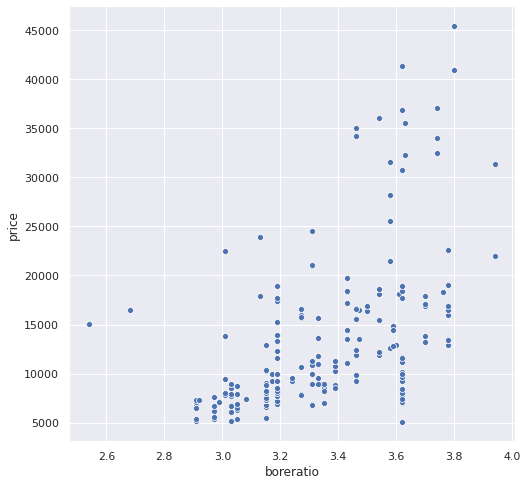

In [60]:
sns.scatterplot(x="boreratio", y="price", data=data,color='b')

# Stroke vs price

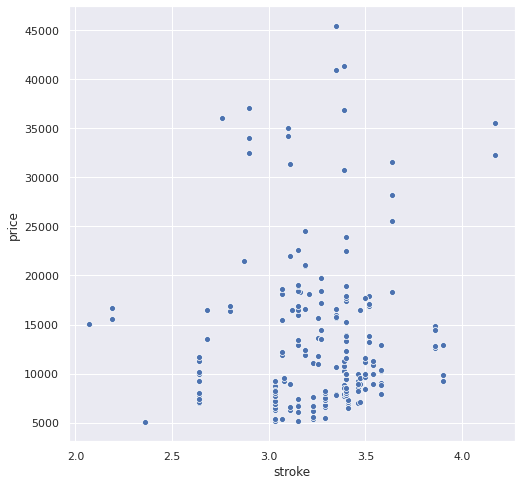

In [61]:
sns.scatterplot(x="stroke", y="price", data=data,color='b')

* very weak correlation between stroke vs price

# Compression ratio vs Price

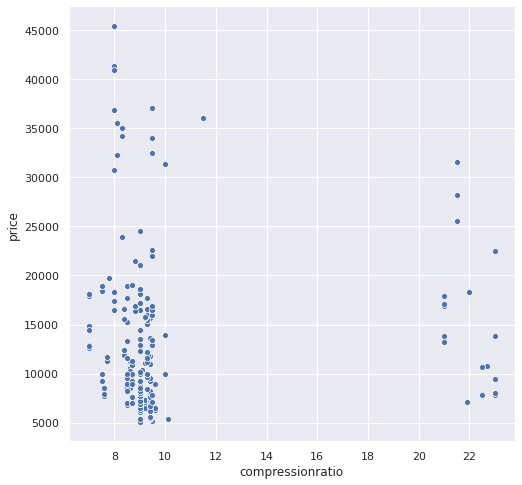

In [62]:
sns.scatterplot(x="compressionratio", y="price", data=data,color='b')

* no relation between compression ratio and price

# Horsepower vs Price

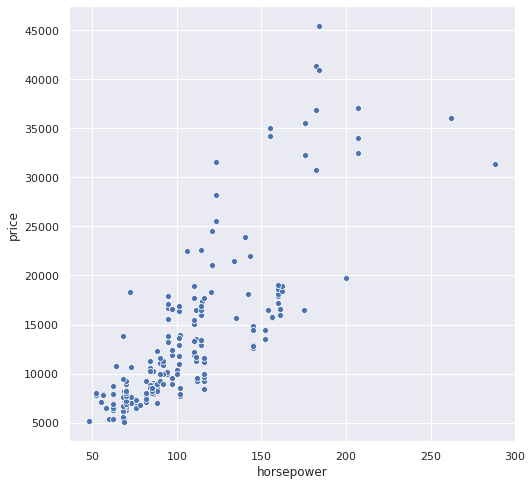

In [63]:
sns.scatterplot(x="horsepower", y="price", data=data,color='b')

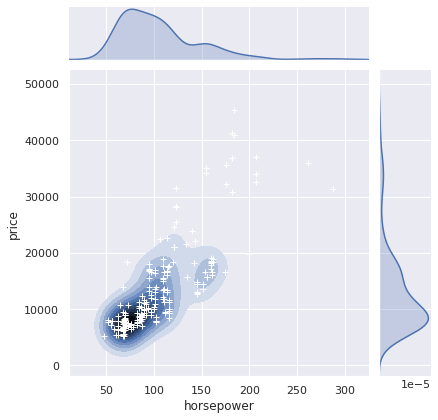

In [64]:
g = sns.jointplot(x="horsepower", y="price", data=data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("horsepower", "price");

# Peakrpm vs price

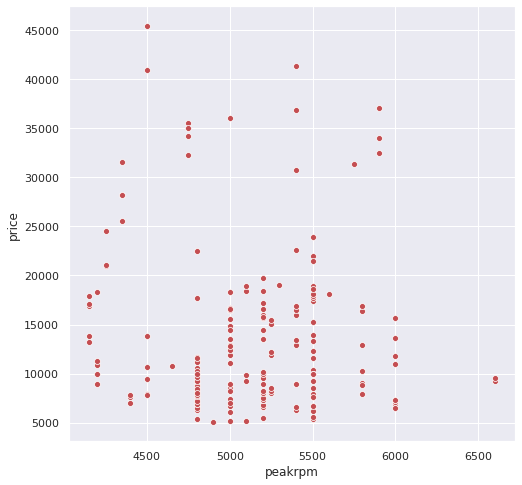

In [65]:
sns.scatterplot(x="peakrpm", y="price", data=data,color='r')

* no correlation between peakrpm and  price

# Citympg vs Price

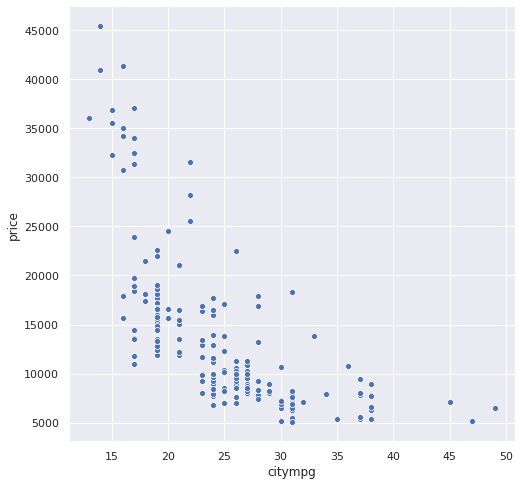

In [66]:
sns.scatterplot(x="citympg", y="price", data=data,color='b')

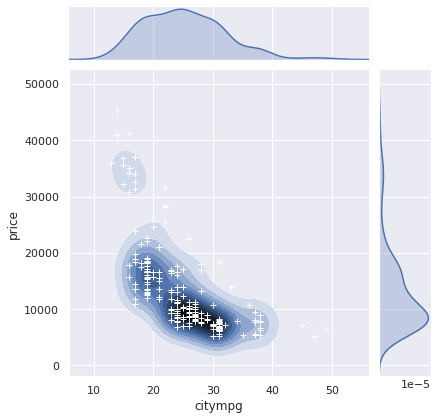

In [67]:
g = sns.jointplot(x="citympg", y="price", data=data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("citympg", "price");

* negative correlation is seen between citympg and price

# Highwaympg vs Price

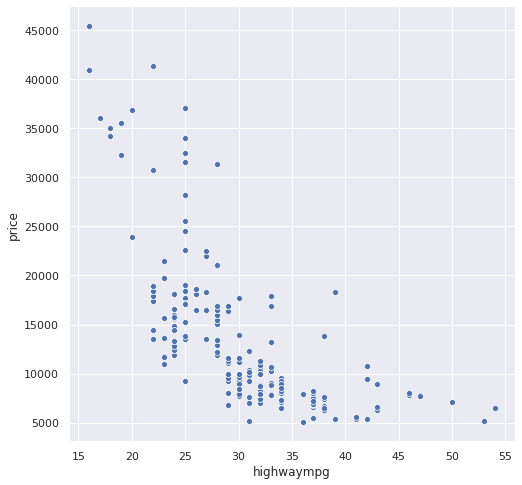

In [68]:
sns.scatterplot(x="highwaympg", y="price", data=data,color='b')

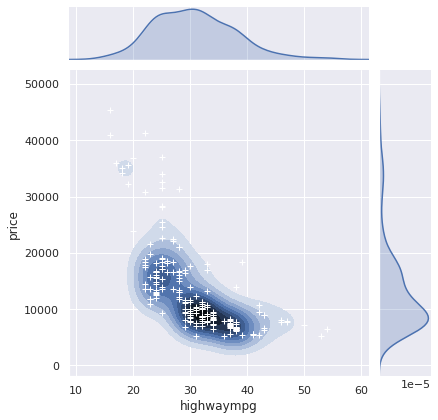

In [69]:
g = sns.jointplot(x="highwaympg", y="price", data=data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("highwaympg", "price");

* negative correlation between highwaympg and price

# Pairplot of all numerical features

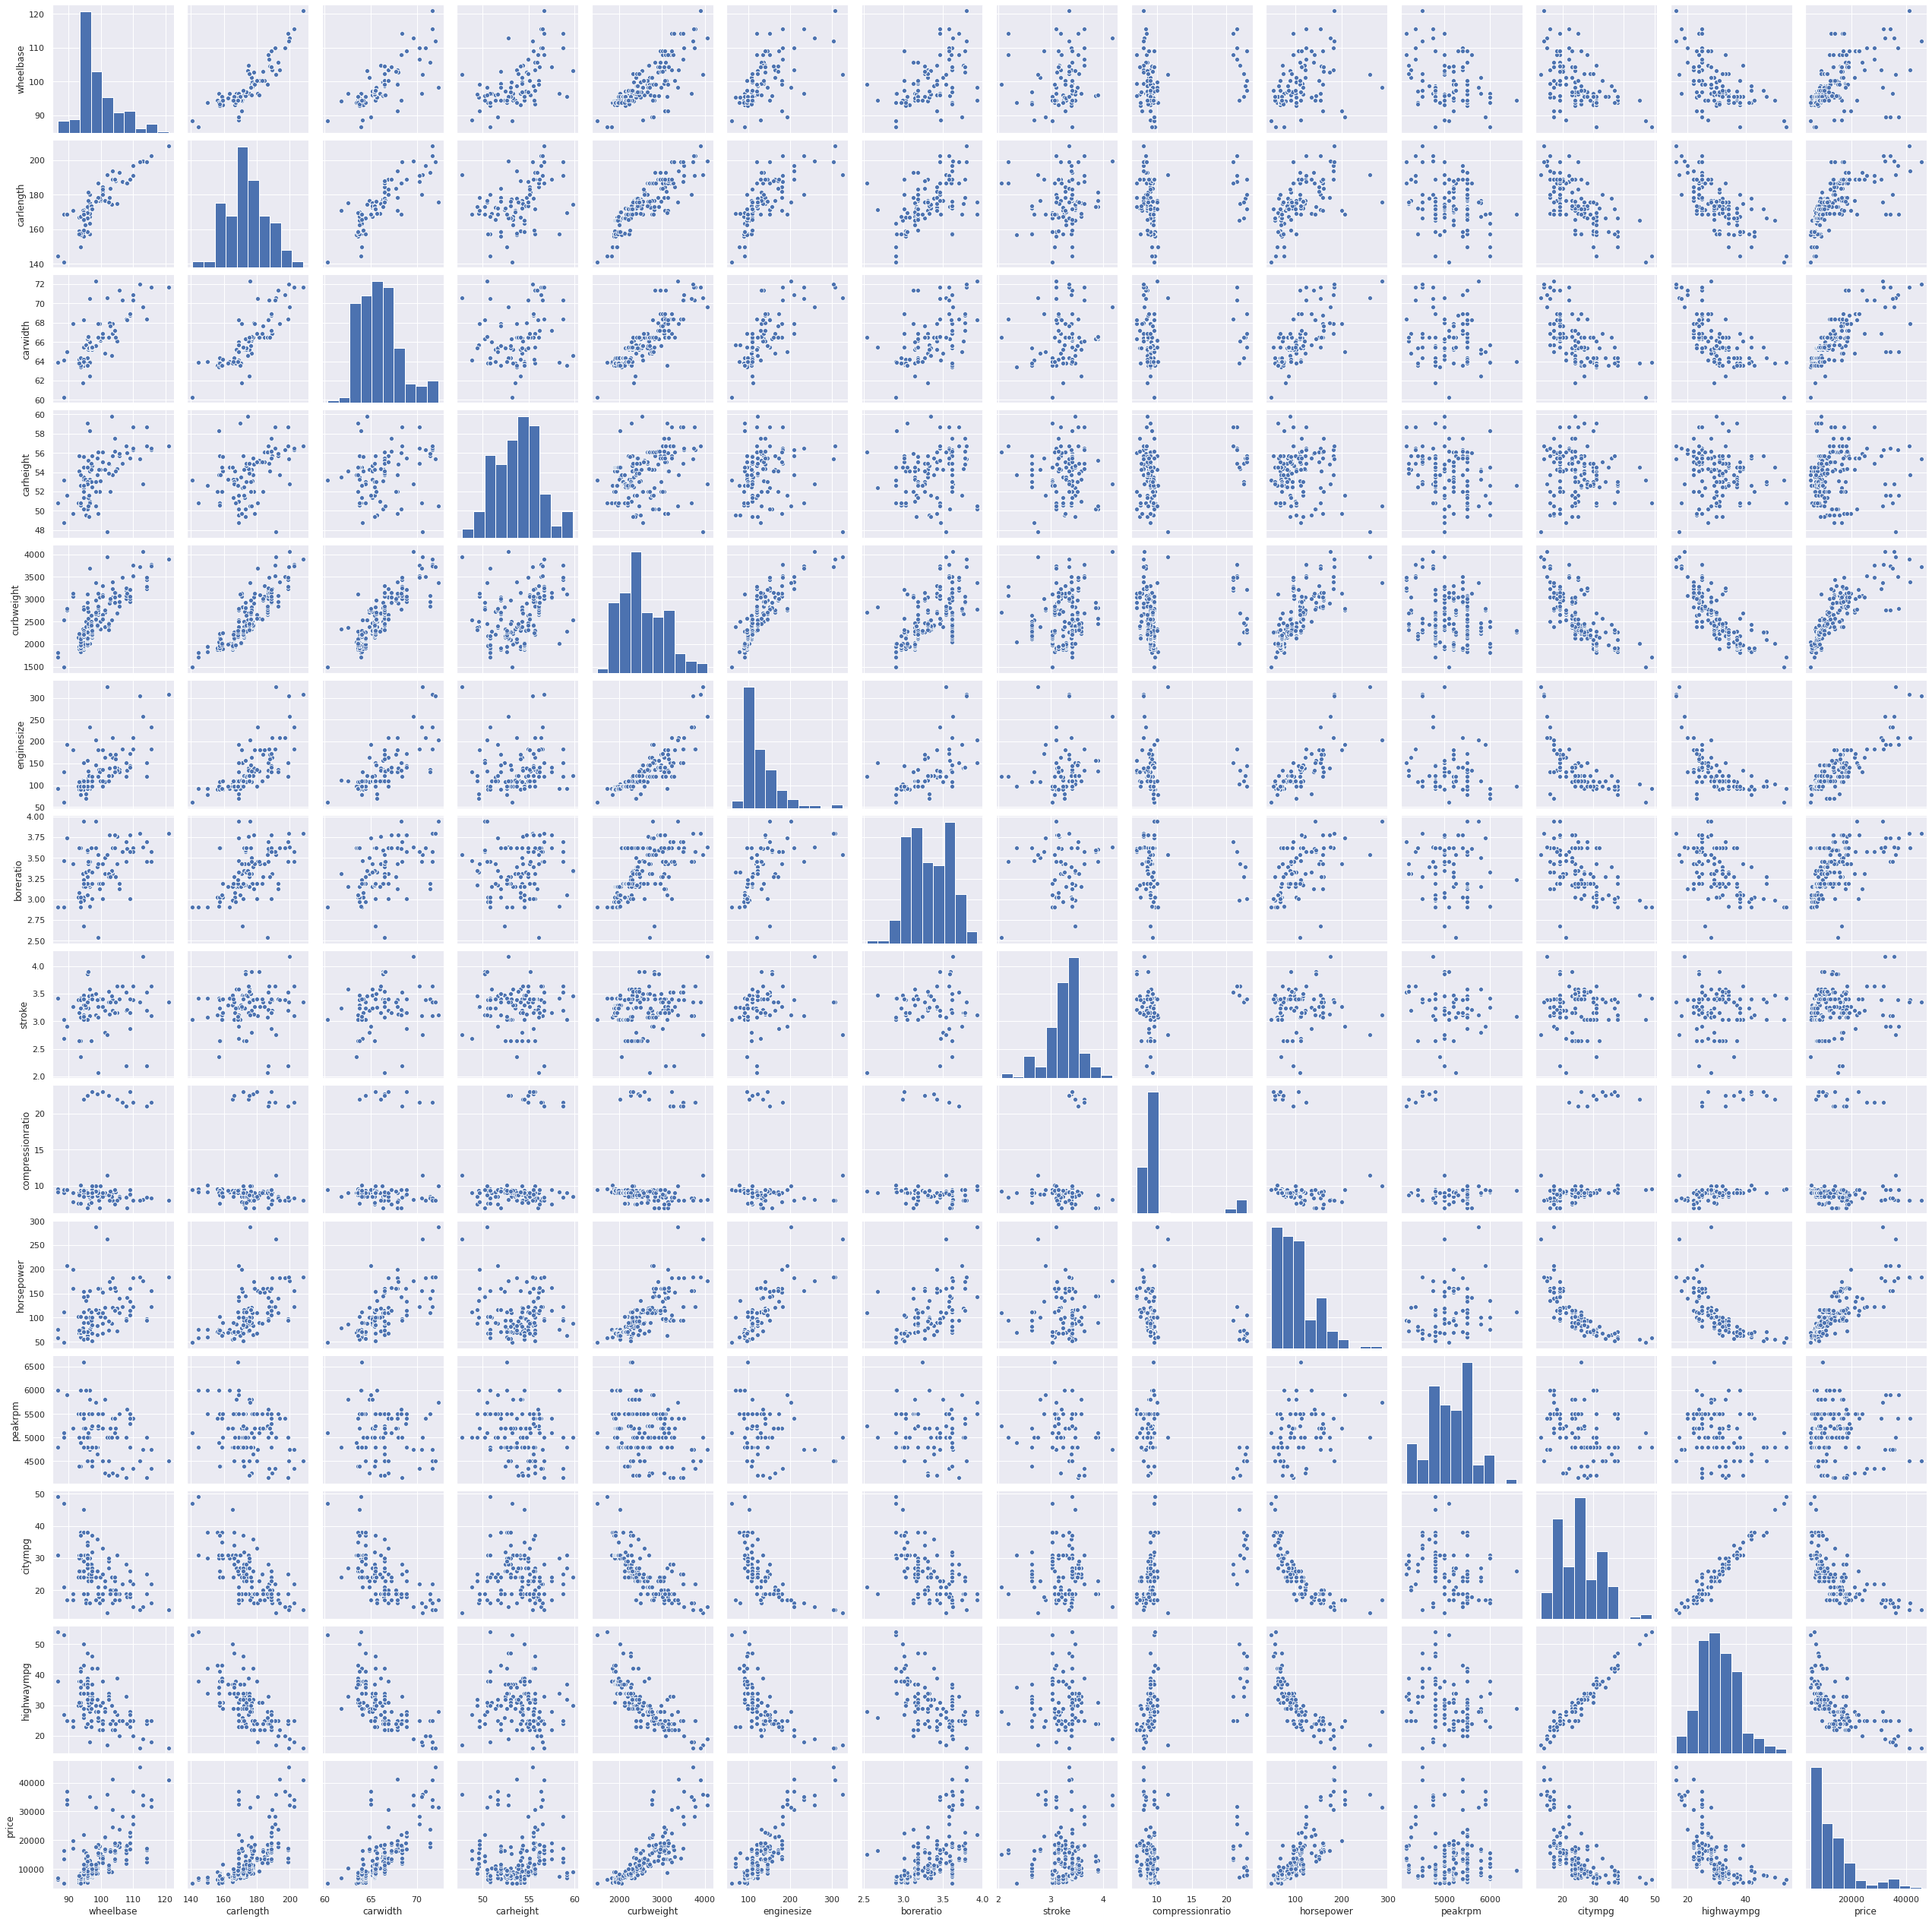

In [70]:
ax = sns.pairplot(data[numerical_cols])

# Correlation matrix

In [71]:
data[numerical_cols].corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


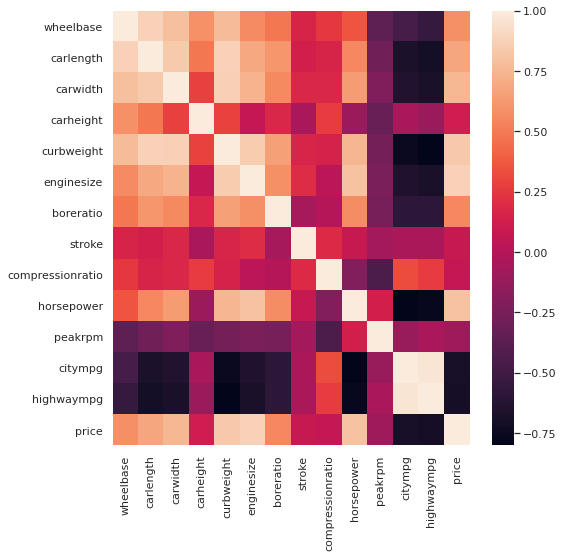

In [72]:
sns.heatmap(data[numerical_cols].corr())

* wheelbase has high positive correlation with carlength,carwidth and curbweight	
* carlength has high postive correlation with curbweight
* carlength has negative correlation with highwaympg 
* carwidth has high postive correlation with curbweight and engine size
* enginesize has high positive correlation with horsepower
* curbweight has high positive correlation with engine size and horse power, negative correlation with highwaympg
* horsepower has negative correlation with citympg and highwaympg
* citympg and highwaympg are highly correlated 


# Scatter plot of wheelbase , carlength,carheight and carweight  with price

In [73]:
col=['wheelbase','carlength','carwidth','curbweight','price']

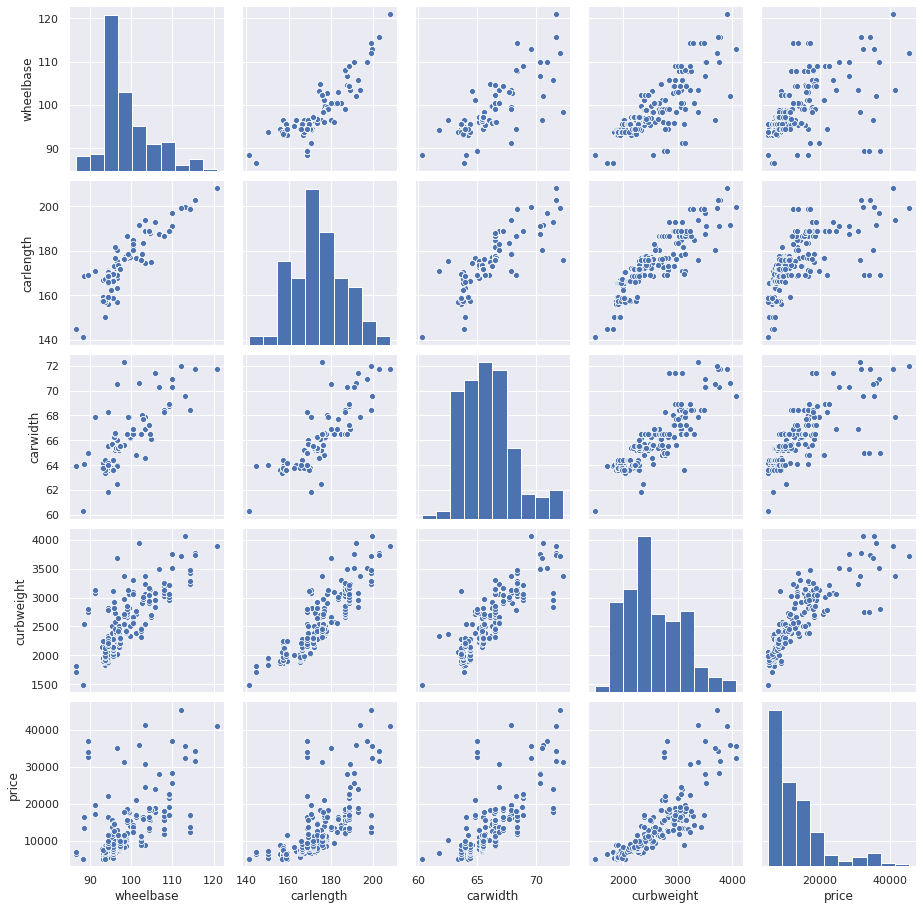

In [74]:
sns.pairplot(data[col])

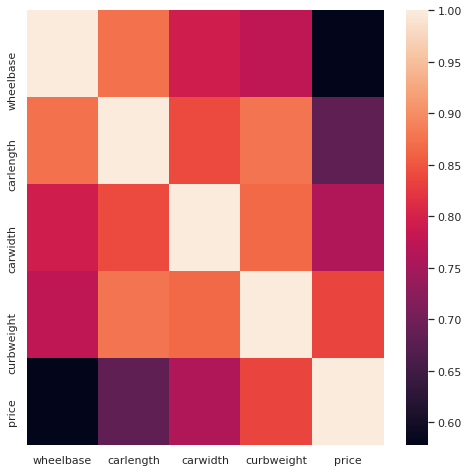

In [75]:
sns.heatmap(data[col].corr())

# Scatter plot of carlength,curbweight,highwaympg with price

In [76]:
col=['carlength','highwaympg','curbweight','price']

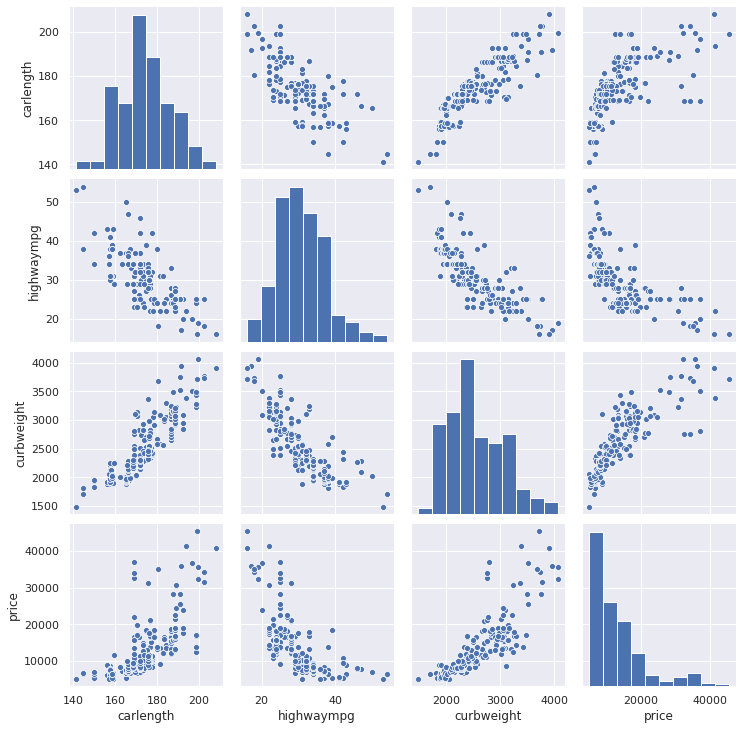

In [77]:
sns.pairplot(data[col])

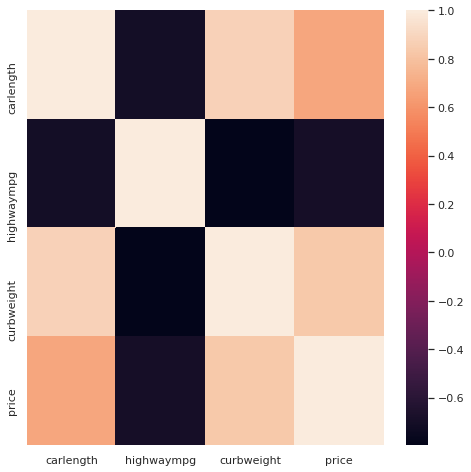

In [78]:
sns.heatmap(data[col].corr())

# Scatter plot of carwidth,curbweight ,engine size and price

In [79]:
col=['carwidth','curbweight','enginesize','price']

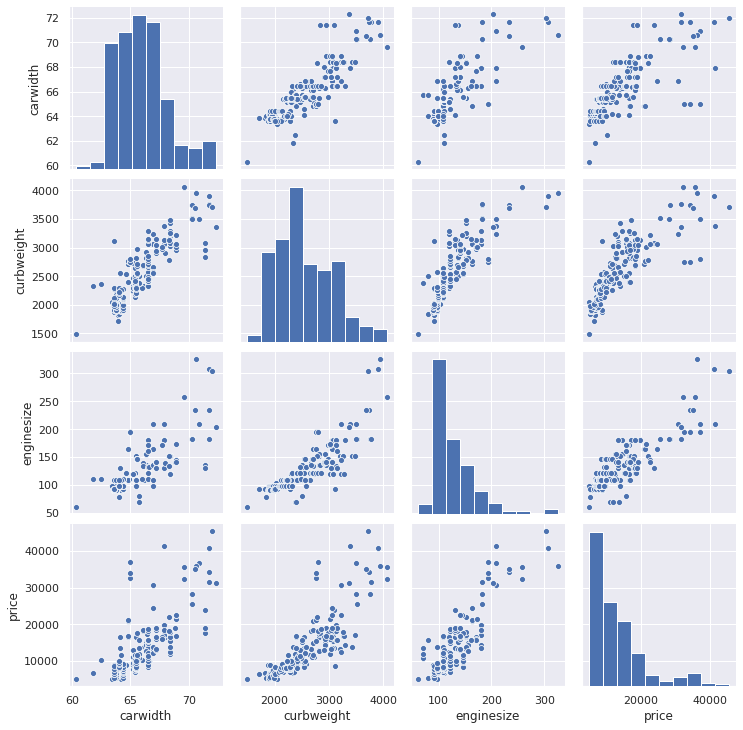

In [80]:
sns.pairplot(data[col])

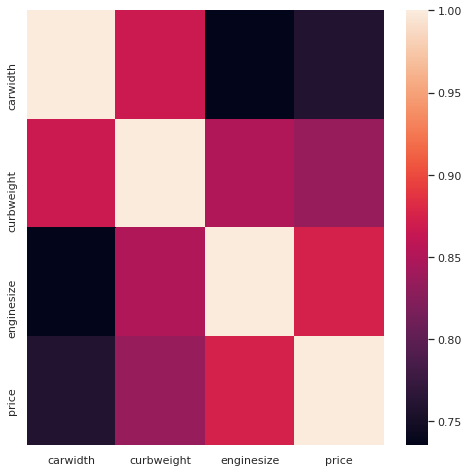

In [81]:
sns.heatmap(data[col].corr())

# Scatter plot of curbweight ,engine size ,horse power,highwaympg and price

In [82]:
col=['curbweight','enginesize','horsepower','highwaympg','price']

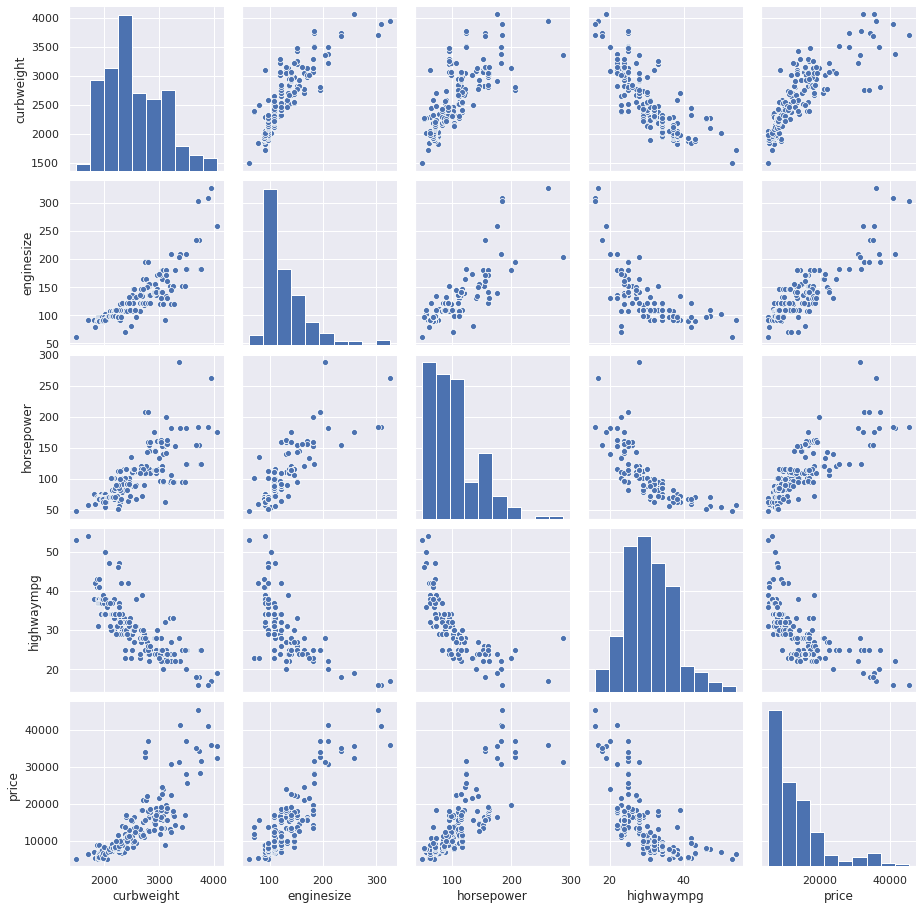

In [83]:
sns.pairplot(data[col])

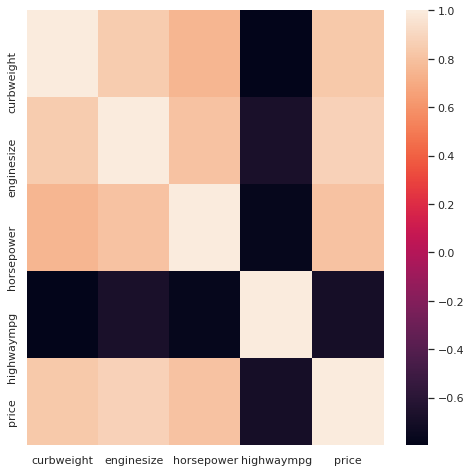

In [84]:
sns.heatmap(data[col].corr())

# Horsepower,citympg , highway mpg  and price

In [85]:
col=['horsepower','citympg','highwaympg','price']

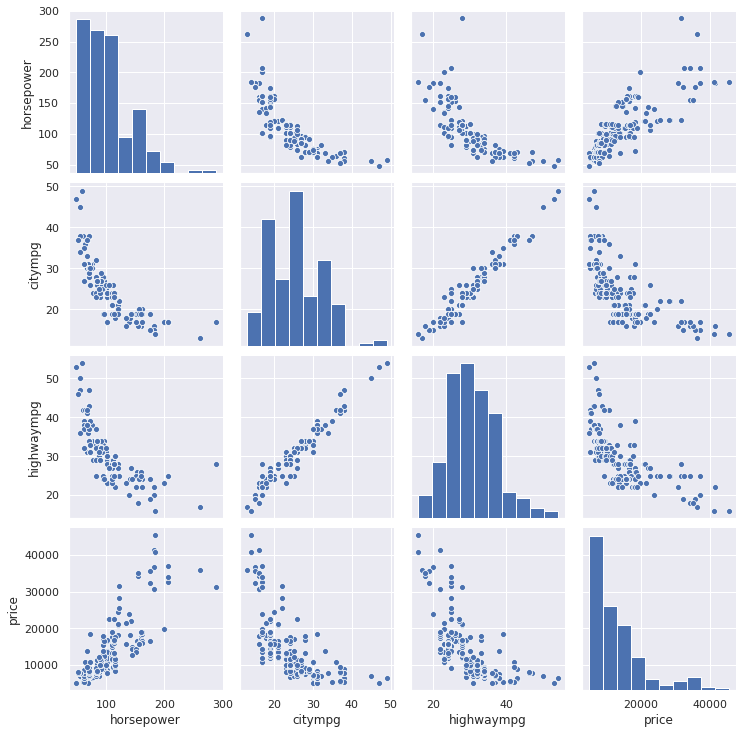

In [86]:
sns.pairplot(data[col])

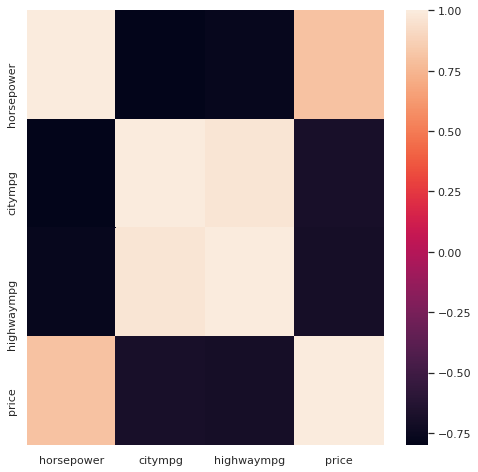

In [87]:
sns.heatmap(data[col].corr())

# Horsepower Vs Car Body categorized by carbody

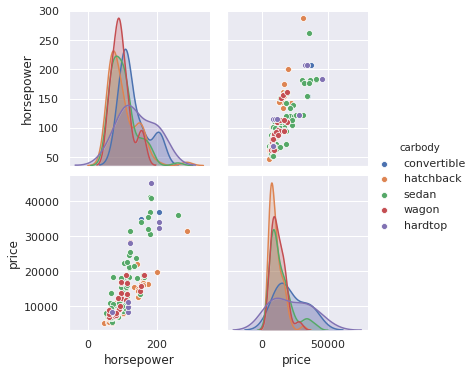

In [88]:
sns.pairplot(data[['horsepower','price','carbody']], hue="carbody");

# Fitting all features with price

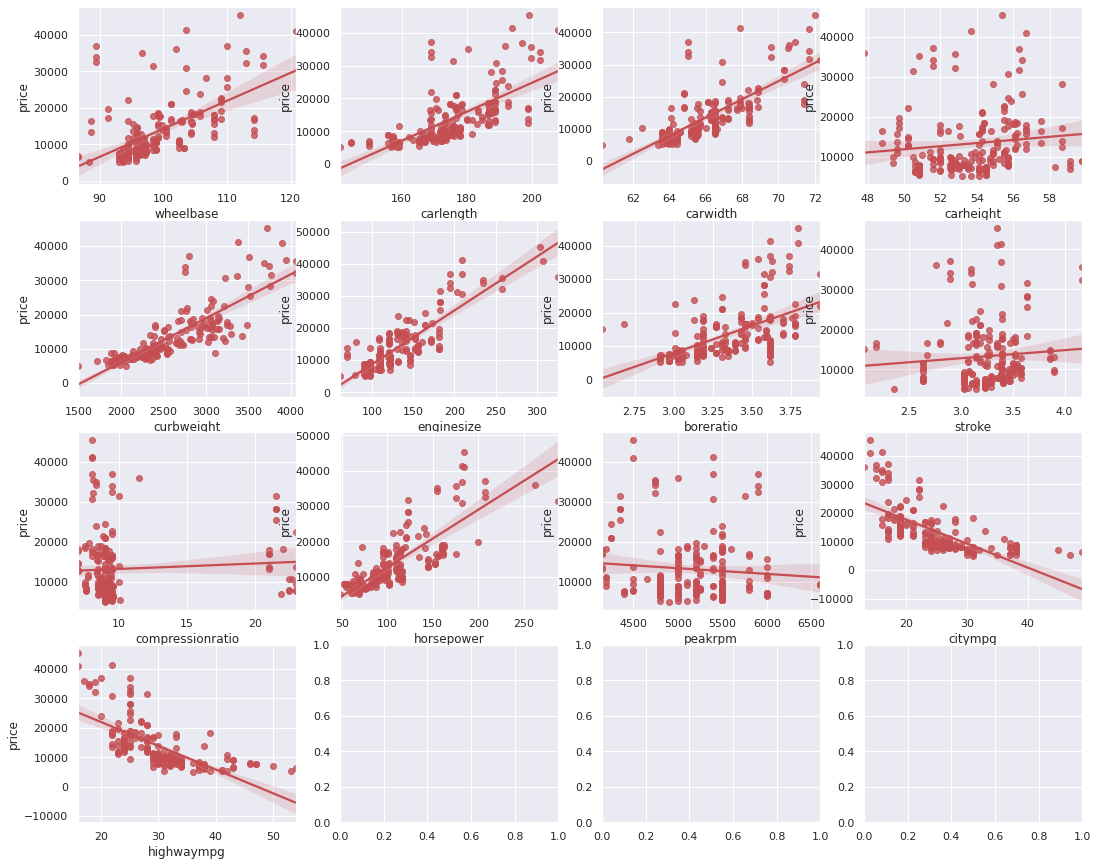

In [89]:
fig,axes = plt.subplots(4,4,figsize=(18,15))
for seg,col in enumerate(numerical_cols[:len(numerical_cols)-1]):
    
    x,y = seg//4,seg%4
    sns.regplot(x=col, y='price' ,data=data,ax=axes[x][y],color='r')


<font size="+3" color='#540b11'><b>3. Feature Selection </b></font>

Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

In [90]:
X=data[numerical_cols].drop('price',axis=1)
y=data['price']

# Recursive feature elimination (RFE) with random forest

In [91]:
X = data.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X=X.drop(['CarName','price'],axis=1)
y=data['price']

In [92]:

# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X, y)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])


Chosen best 15 feature by rfe: Index(['carbody', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


In [93]:
features=list(X.columns[rfe.support_])

<font size="+3" color='#540b11'><b>4. Data Modelling and Evaluation </b></font>

In [94]:
x = X[features]
y = data.price
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

# Linear Regression

In [95]:
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_train_pred = lreg.predict(x_train)
y_test_pred = lreg.predict(x_test)
lreg.score(x_test,y_test)

0.7299712173396138

# Decision Tree Regressor

In [96]:
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train,y_train)
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)
dt_regressor.score(x_test,y_test)

0.8699113195927972

# Random Forest regressor

In [97]:
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(x_train,y_train)
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)


r2_score(y_test,Rf_test_pred)

0.9146935875209264

# ElasticNet

In [98]:
from sklearn.linear_model import ElasticNet

In [99]:
EL = ElasticNet()


EL.fit(x_train,y_train)
EL_train_pred = EL.predict(x_train)
EL_test_pred = EL.predict(x_test)


r2_score(y_test,EL_test_pred)

0.7328563089122468

<img src="https://i.pinimg.com/originals/e2/d7/c7/e2d7c71b09ae9041c310cb6b2e2918da.gif">